##Task 1: Image filtering and enhancement

###Question 1

In [43]:
x = np.array([[4, 1, 6, 1, 3],
              [3, 2, 7, 7, 2],
              [2, 5, 7, 3, 7],
              [1, 4, 7, 1, 3],
              [0, 1, 6, 4, 4]])
k = (1/9.0)*np.array([[1, 1, 1], 
                      [1, 1, 1], 
                      [1, 1, 1]])
print "Output:"
signal.convolve2d(x, k, boundary='symm', mode='same')

Output:


array([[ 2.88888889,  3.77777778,  3.55555556,  4.        ,  2.77777778],
       [ 2.88888889,  4.11111111,  4.33333333,  4.77777778,  3.88888889],
       [ 2.55555556,  4.22222222,  4.77777778,  4.88888889,  3.88888889],
       [ 1.77777778,  3.66666667,  4.22222222,  4.66666667,  4.        ],
       [ 0.88888889,  2.88888889,  3.77777778,  4.33333333,  3.44444444]])

###Question 2

In [44]:
print "Output:"
scipy.ndimage.filters.median_filter(x, 3)

Output:


array([[3, 4, 2, 3, 3],
       [3, 4, 5, 6, 3],
       [2, 4, 5, 7, 3],
       [1, 4, 4, 4, 4],
       [1, 1, 4, 4, 4]])

It is seen that the values in the mean filter output are all close to 4 in terms of value. While for the median filter output, there is still some variation in the values as it ranges from 4 to 7. Hence the median filter preserves the edges in the image better. Also, it is seen that all the numbers in the output are still whole numbers after convolving with the median filter.

###Question 3

In [39]:
import math

sobx = np.array([[1, 0, -1], 
                 [2, 0, -2], 
                 [1, 0, -1]])
soby = -1*np.transpose(sobx)

df_dx = signal.convolve2d(x, sobx, boundary='symm', mode='same')
df_dy = signal.convolve2d(x, soby, boundary='symm', mode='same')
df_dx_center = df_dx[2][2]
df_dy_center = df_dy[2][2]
gradient_magnitude_ctr = np.sqrt(np.square(df_dx_center)+np.square(df_dy_center))
gradient_direction_ctr = math.degrees(math.atan(df_dy_center/df_dx_center*1.0))

print "Gradient magnitude at center:", gradient_magnitude_ctr
print "Gradient direction at center (in degrees):", gradient_direction_ctr

Gradient magnitude at center: 4.472135955
Gradient direction at center (in degrees): -63.4349488229


###Question 4

First we display the 3 images after reading them into files

We display the original images using the display method first


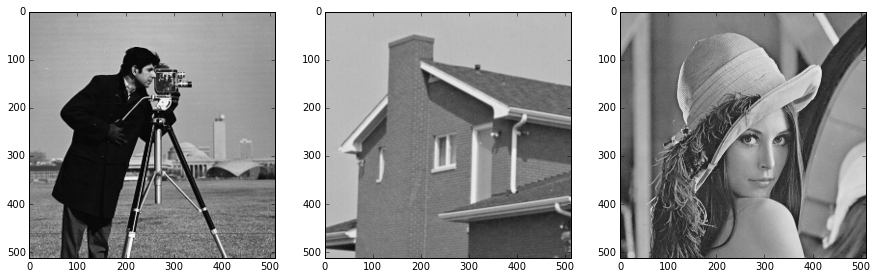

In [341]:
def display(img):
    plt.imshow(img, cmap = cm.Greys)
    plt.show()
    
def display3(img1, img2, img3):
    f, axes = plt.subplots(ncols=3, figsize=(15,15))
    axes[0].imshow(img1, cmap = cm.Greys)
    axes[1].imshow(img2, cmap = cm.Greys)
    axes[2].imshow(img3, cmap = cm.Greys)
    plt.show()

img1 = misc.imread("./Images/Q1/cameraman.jpg")
img2 = misc.imread("./Images/Q1/house.jpg")
img3 = misc.imread("./Images/Q1/lena.jpg")

print "We display the original images using the display method first"

display3(img1,img2,img3)

We display the noisy images


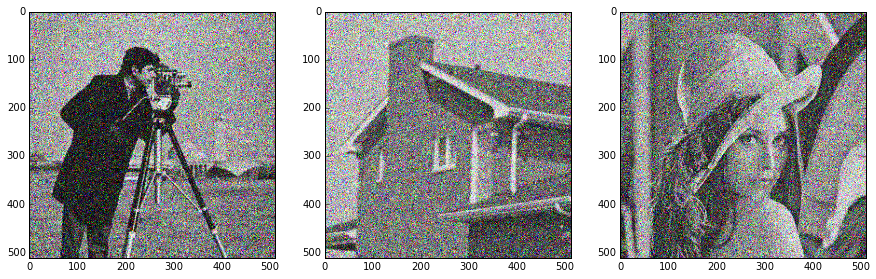

In [342]:
from skimage import color
import skimage
# import random .

def add_noise(img,varn=0.1):
    return skimage.util.random_noise(img, mode='gaussian', seed=0, clip=True, var=varn)

img1_noise = add_noise(img1)
img2_noise = add_noise(img2)
img3_noise = add_noise(img3)

print "We display the noisy images"

display3(img1_noise,img2_noise,img3_noise)

**Part a:** For a filter that only takes the pixel distance into account, we require a filter which has all values at the same distance from the center having the same value. An example of this is the gaussian filter. We use the gaussian filter for the given problem with sigma=1.5. For smaller values of sigma, too much noise is still present. While for larger values of sigma, there is too much blur.


Filter non-noisy images with gaussian with sigma = 1.5


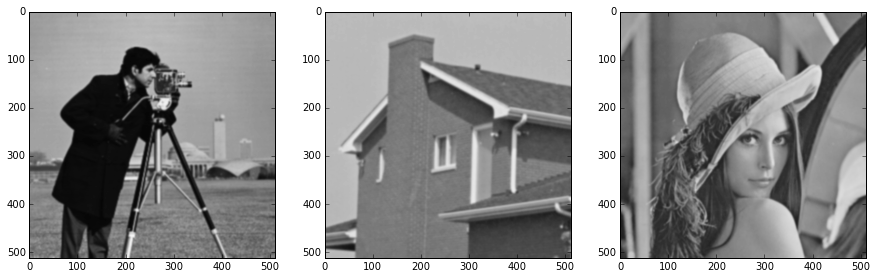


Filter noisy images with Gaussian with sigma = 1.5


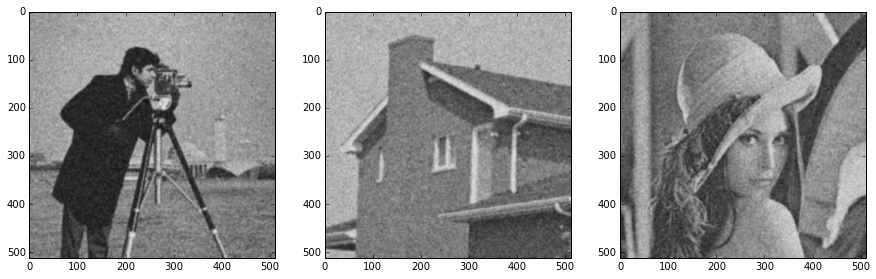

In [343]:
sigma = 1.5
img1_distfiltered = scipy.ndimage.filters.gaussian_filter(img1, sigma)
img2_distfiltered = scipy.ndimage.filters.gaussian_filter(img2, sigma)
img3_distfiltered = scipy.ndimage.filters.gaussian_filter(img3, sigma)
print "\nFilter non-noisy images with gaussian with sigma =",sigma
display3(img1_distfiltered,img2_distfiltered,img3_distfiltered)

img1_noisy_distfiltered = scipy.ndimage.filters.gaussian_filter(img1_noise, sigma)
img2_noisy_distfiltered = scipy.ndimage.filters.gaussian_filter(img2_noise, sigma)
img3_noisy_distfiltered = scipy.ndimage.filters.gaussian_filter(img3_noise, sigma)
print "\nFilter noisy images with Gaussian with sigma =",sigma
display3(img1_noisy_distfiltered,img2_noisy_distfiltered,img3_noisy_distfiltered)

**Part b:** For a filter that only takes the pixel value into account, we can use the median filter. This looks at all neighbours and sorts them and selects the mean. Hence the position doesn't matter. For the given problem, we use a kernel size of 5x5. For smaller kernel sizes, there is too much noise. For higher kernel sizes, the blurring becomes too significant and the computation time increases signficantly


Filter non-noisy images with median filter


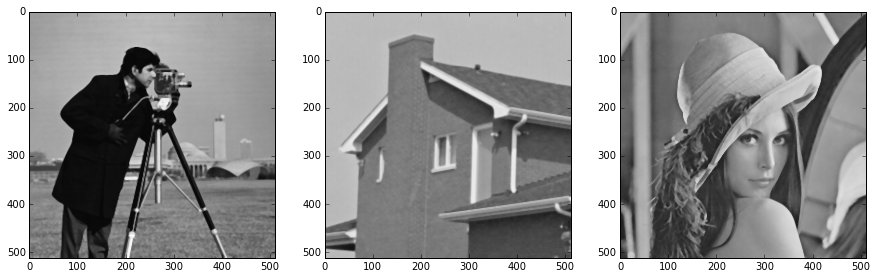


Filter noisy images with median filter


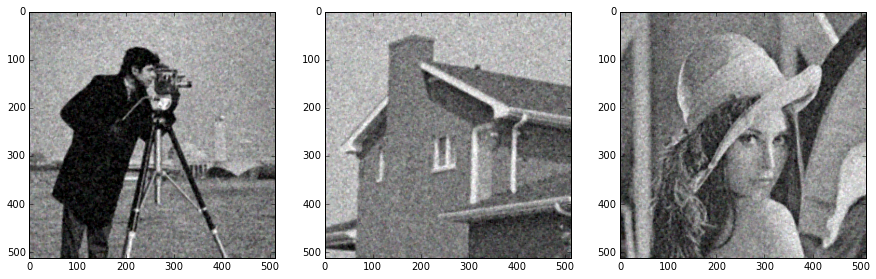

In [363]:
kernel_size = 5
img1_valfiltered = scipy.ndimage.filters.median_filter(img1, kernel_size)
img2_valfiltered = scipy.ndimage.filters.median_filter(img2, kernel_size)
img3_valfiltered = scipy.ndimage.filters.median_filter(img3, kernel_size)
print "\nFilter non-noisy images with median filter"
display3(img1_valfiltered,img2_valfiltered,img3_valfiltered)

img1_noisy_valfiltered = scipy.ndimage.filters.median_filter(img1_noise, kernel_size)
img2_noisy_valfiltered = scipy.ndimage.filters.median_filter(img2_noise, kernel_size)
img3_noisy_valfiltered = scipy.ndimage.filters.median_filter(img3_noise, kernel_size)
print "\nFilter noisy images with median filter"
display3(img1_noisy_valfiltered,img2_noisy_valfiltered,img3_noisy_valfiltered)

**Part c:** For a filter that takes into account both the pixel value and the pixel distance, we can use the bilateral filter, which is an edge-preserving and noise reducing filter. For the sigma range, we use a value of 5. For sigma spatial, we use a value of 2. Increasing sigma spatial beyond this value only makes the image more blurry without removing more noise. Lower sigma range does not filter out enough noise. While increasing sigma range produces diminishing improvements.


Filter non-noisy images with bilateral filter


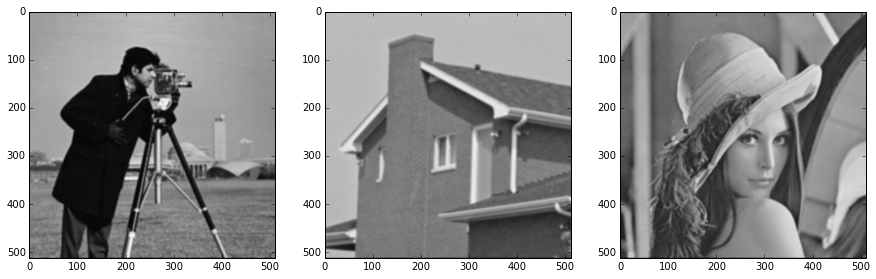


Filter noisy images with bilateral filter


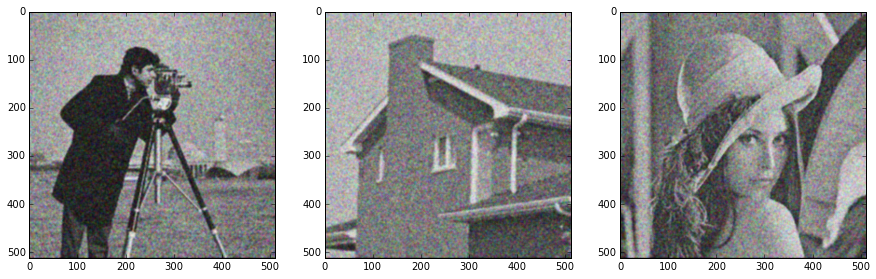

In [357]:
from skimage.restoration import denoise_bilateral

sigma_rng = 0.5
sigma_sptl = 5

img1_distvalfiltered = denoise_bilateral(img1, sigma_range=sigma_rng, sigma_spatial=sigma_sptl)
img2_distvalfiltered = denoise_bilateral(img2, sigma_range=sigma_rng, sigma_spatial=sigma_sptl)
img3_distvalfiltered = denoise_bilateral(img3, sigma_range=sigma_rng, sigma_spatial=sigma_sptl)
print "\nFilter non-noisy images with bilateral filter"
display3(img1_distvalfiltered,img2_distvalfiltered,img3_distvalfiltered)

img1_noisy_distvalfiltered = denoise_bilateral(img1_noise, sigma_range=sigma_rng, sigma_spatial=sigma_sptl)
img2_noisy_distvalfiltered = denoise_bilateral(img2_noise, sigma_range=sigma_rng, sigma_spatial=sigma_sptl)
img3_noisy_distvalfiltered = denoise_bilateral(img3_noise, sigma_range=sigma_rng, sigma_spatial=sigma_sptl)
print "\nFilter noisy images with bilateral filter"
display3(img1_noisy_distvalfiltered,img2_noisy_distvalfiltered,img3_noisy_distvalfiltered)



Based on the results above, it is seen that the gaussian filter is better at removing noise, but the edges are more blurred. This can be seen in the first figure below (difference of the original image and the filtered image) where the edges are more prominent in the difference, implying they were removed by the filter.

While for the median filter, it is less effective at reducing noise, but preserves the edges better. This can be seen from the second figure below where the edges are less prominent than for the gaussian filter, implying they were retained by the filter. But we can also observe more noise generated by the filter itself in the image.

In the case of the bilateral filter, there is a good compromise between noise reduction and edge preservation. Noise is removed from the uniform areas but there is some averaging. The edges are present, but not as thick as the gaussian filter.

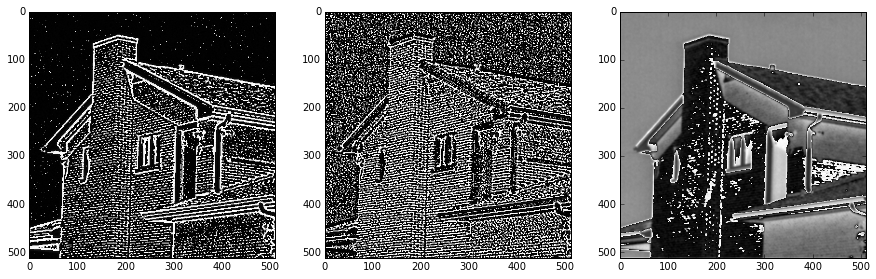

In [364]:
display3((img2-img2_distfiltered),(img2-img2_valfiltered),(img2-img2_distvalfiltered))

###Question 5

In [366]:
def blur(img, g_sigma, n=2):
    return ndimage.filters.gaussian_filter(img, g_sigma)

def f_unsharp(img, g_sigma, n=2):
    g_star_img = ndimage.filters.gaussian_filter(img, g_sigma)
    unsharp_img = n*img - g_star_img
    return unsharp_img

Set A: f_unsharped images and blur images with sigma = 0.75


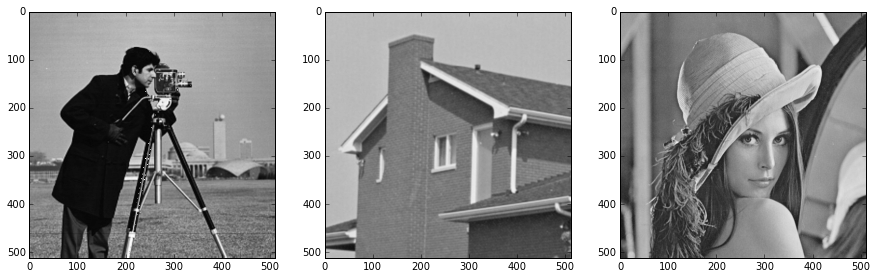


Set B: f_unsharped images and blur images with sigma = 2.5


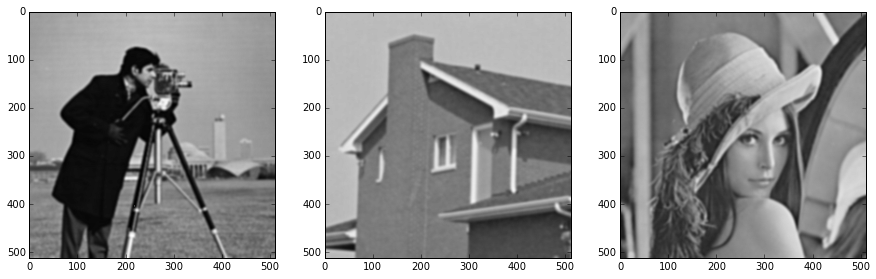

Set C: f_unsharped images with sigma = 2.5 and blur images with sigma = 0.75


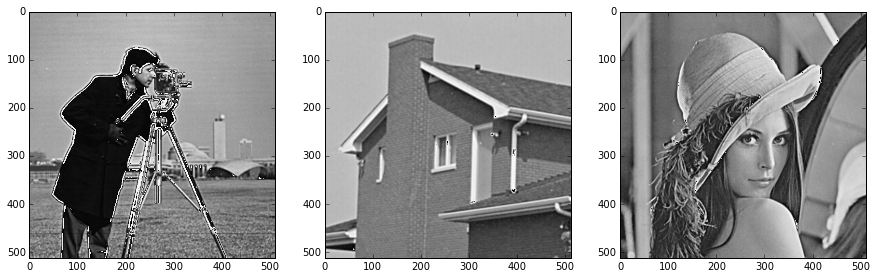


Set D: f_unsharped images with sigma = 0.75 and blur images with sigma = 2.5


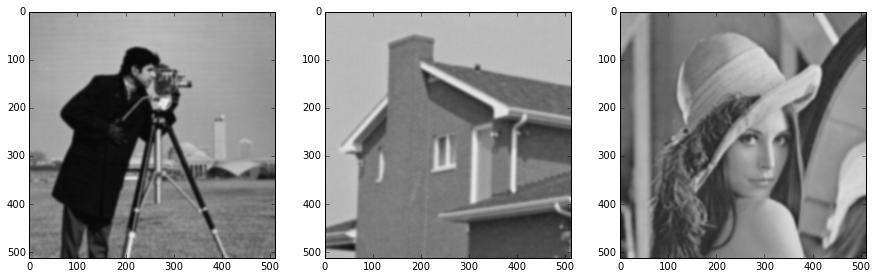

In [370]:
# first blur the images
img1_blur_0_75 = blur(img1, 0.75)
img1_blur_2_5 = blur(img1, 2.5)
img2_blur_0_75 = blur(img2, 0.75)
img2_blur_2_5 = blur(img2, 2.5)
img3_blur_0_75 = blur(img3, 0.75)
img3_blur_2_5 = blur(img3, 2.5)

print "Set A: f_unsharped images and blur images with sigma = 0.75"
display3(f_unsharp(img1_blur_0_75, 0.75),f_unsharp(img2_blur_0_75, 0.75),f_unsharp(img3_blur_0_75, 0.75))
print "\nSet B: f_unsharped images and blur images with sigma = 2.5"
display3(f_unsharp(img1_blur_2_5, 2.5),f_unsharp(img2_blur_2_5, 2.5),f_unsharp(img3_blur_2_5, 2.5))
print "Set C: f_unsharped images with sigma = 2.5 and blur images with sigma = 0.75"
display3(f_unsharp(img1_blur_0_75, 2.5),f_unsharp(img2_blur_0_75, 2.5),f_unsharp(img3_blur_0_75, 2.5))
print "\nSet D: f_unsharped images with sigma = 0.75 and blur images with sigma = 2.5"
display3(f_unsharp(img1_blur_2_5, 0.75),f_unsharp(img2_blur_2_5, 0.75),f_unsharp(img3_blur_2_5, 0.75))

In Set A above (sigma = 0.75 for both blur and unsharp mask), we notice that the images are sharpened and clear.

In Set B and Set D where the sigma for blur is 2.5, the blur effect dominates and the unsharp masked image is still blur.

In Set C on the other hand, where the blur is with sigma = 0.75 and the unsharp mask is with sigma = 2.5, we notice a halo effect around the edges.

To explain what happens, we can rewrite the f_unsharp method as:

`f_unsharp(x,y) = 2f(x,y) - g(x,y)*f(x,y)`

`= f(x,y) + (f(x,y) - g(x,y)*f(x,y))`

So, based on the above equation, we are basically adding to the image the term within the bracket. 

`g(x,y)*f(x,y)` produces a blurred image with the high frequencies filtered out.

`(f(x,y) - g(x,y)*f(x,y))` then removes all the low frequency components from `f(x,y)` leaving only the area around the edges highlighted. The thickness of the edge depends on the sigma used. The higher the sigma, the higher the edge thickness. This is demonstrated by the images below.

For, thin edges, when it is added back to original image, it produces a sharpening effecting as seen in set A above. For thick edges, when it is added back to the original image, it can produce the halo effect seen in Set C.

Edges when sigma = 0.75


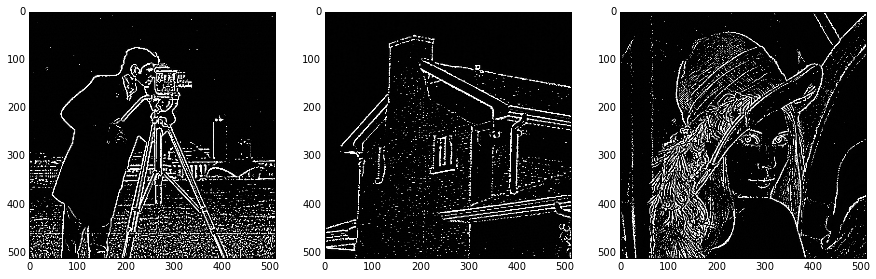


Edges when sigma = 2.5


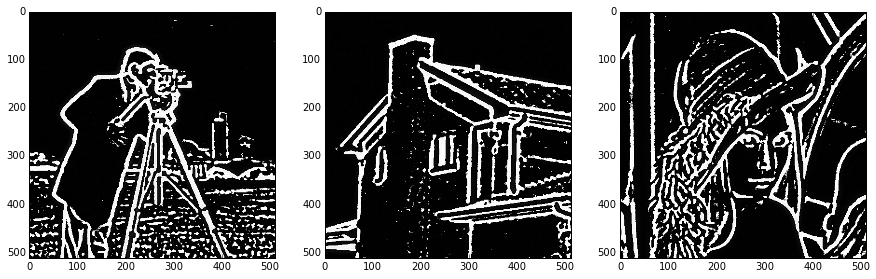

In [375]:
print "Edges when sigma = 0.75"
display3(f_unsharp(img1_blur_0_75, 0.75, 1),f_unsharp(img2_blur_0_75, 0.75, 1),f_unsharp(img3_blur_0_75, 0.75, 1))
print "\nEdges when sigma = 2.5"
display3(f_unsharp(img1_blur_2_5, 2.5, 1),f_unsharp(img2_blur_2_5, 2.5, 1),f_unsharp(img3_blur_2_5, 2.5, 1))


##Task 2: Color quantization with k-means

We first read in the images

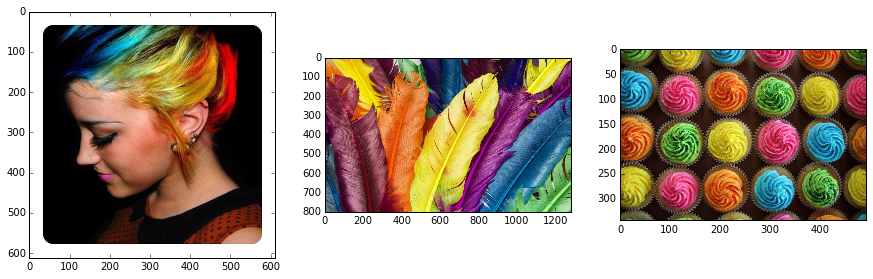

In [405]:
cimg1 = np.array(misc.imread("./Images/Q2/colorful1.jpg"))/255.0
cimg2 = np.array(misc.imread("./Images/Q2/colorful2.jpg"))/255.0
cimg3 = np.array(misc.imread("./Images/Q2/colorful3.jpg"))/255.0
display3(cimg1, cimg2, cimg3)

###Question 1

Quantized RGB images


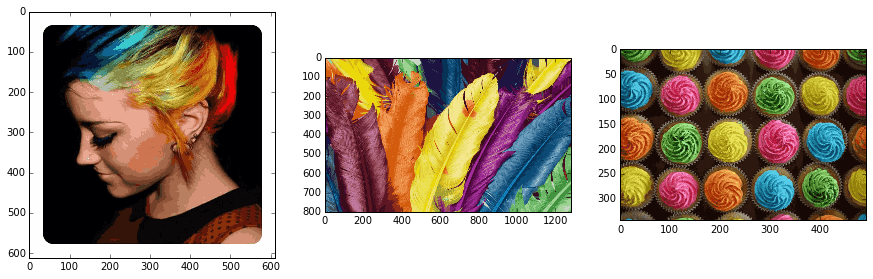

In [407]:
# gets as input an RGB image, quantizes the colors in the image via k-means, 
# and then replaces the color at each pixel with the color of its quantized version
# k is the number of clusters
def quantize_kmeans(img, k):
    # Convert from 8 bits integer encoding to floats and divide by 255
    img = np.array(img, dtype=np.float64)
    w, h = img.shape[0], img.shape[1]
    img_flat = np.reshape(img, (w*h, 3))
    img_flat_sample = shuffle(img_flat, random_state=0)[:5000]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat_sample)
    labels = kmeans.predict(img_flat)
    quantized_rgbs = kmeans.cluster_centers_
    img_quantized = np.zeros(img.shape)
    for i in range(w):
        for j in range(h):
            img_quantized[i][j] = quantized_rgbs[labels[i*h+j]]
    return img_quantized


cimg1_rgbq = quantize_kmeans(cimg1, 32)
cimg2_rgbq = quantize_kmeans(cimg2, 32)
cimg3_rgbq = quantize_kmeans(cimg3, 32)

print "Quantized RGB images"
display3(cimg1_rgbq, cimg2_rgbq, cimg3_rgbq)


###Question 2

Images with L-channel quantized and converted to RGB


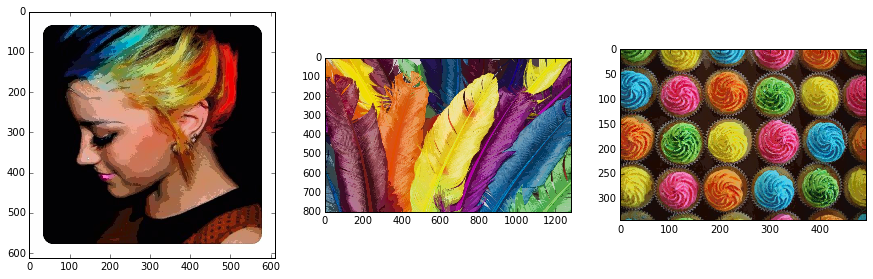

In [462]:
def quantize_lab(rgb, k, ret_lab_img = False):
    w, h = rgb.shape[0], rgb.shape[1]
    lab = color.rgb2lab(rgb)
    lab_flat = np.reshape(lab, (w*h, 3))
    lab_flat_sample = shuffle(lab_flat, random_state=0)[:5000]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(lab_flat_sample)
    labels = kmeans.predict(lab_flat)
    lab_cluster_centers = kmeans.cluster_centers_
    
    lab_quantized = np.array(lab, copy=True)
    
    for i in range(w):
        for j in range(h):
            lab_quantized[i][j][0] = lab_cluster_centers[labels[i*h+j]][0]
    
    # return lab image
    if ret_lab_img:
        return lab_quantized
    
    rgb_quantized = color.lab2rgb(lab_quantized)
    return rgb_quantized

cimg1_labq = quantize_lab(cimg1, 32)
cimg2_labq = quantize_lab(cimg2, 32)
cimg3_labq = quantize_lab(cimg3, 32)

print "Images with L-channel quantized and converted to RGB"
display3(cimg1_labq, cimg2_labq, cimg3_labq)

###Question 3

In [457]:
def get_ssd(rgb1, rgb2):
    return np.sum((rgb1[:,:,0:3] - rgb2[:,:,0:3]) ** 2)

print "\nSSD between rgb quantized images and original"
print "Image 1:", get_ssd(cimg1_rgbq, cimg1), "Image 2:", get_ssd(cimg2_rgbq, cimg2), "Image 3:", get_ssd(cimg3_rgbq, cimg3)

print "\nSSD between images with quantized L channel original"
print "Image 1:", get_ssd(cimg1_labq, cimg1), "Image 2:", get_ssd(cimg2_labq, cimg2), "Image 3:", get_ssd(cimg3_labq, cimg3)


SSD between rgb quantized images and original
Image 1: 1377.2935192 Image 2: 8379.08637852 Image 3: 1339.75646654

SSD between images with quantized L channel original
Image 1: 1636.482586 Image 2: 9751.92195979 Image 3: 1508.11751394


###Question 4

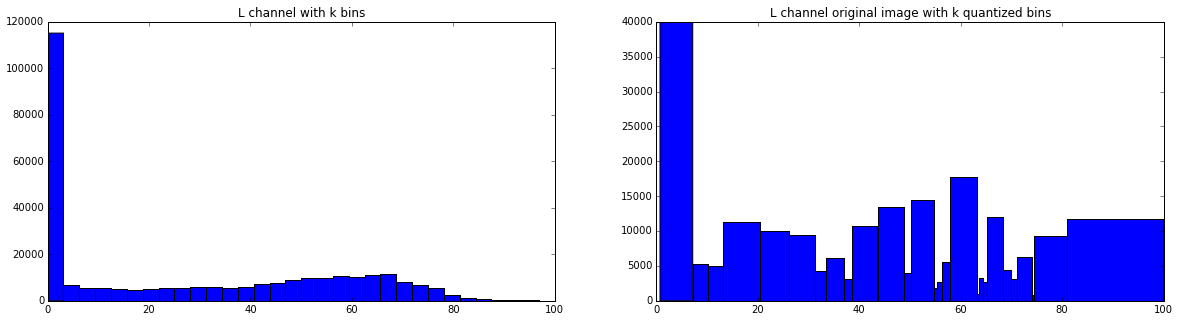

In [475]:
def plot_histogram(rgb, k):
    w, h = rgb.shape[0], rgb.shape[1]
    lab = color.rgb2lab(rgb)
    l = lab[:,:,0].reshape(w*h,)
    
    f, axes = plt.subplots(ncols=2, figsize=(20,5))
    
    # plot l channel with k bins 
    minval = np.min(l)
    maxval = np.max(l)
    axes[0].set_title("L channel with k bins (before quantization)")
    axes[0].hist(l,bins=np.arange(minval,maxval,(1.0*(maxval-minval)/k)))
    
    # plot l channel of original image with k quantized L channel bins 
    lab_img = quantize_lab(rgb, k, True)
    axes[1].set_title("L channel original image with k quantized bins (after quantization)")
    axes[1].hist(l,bins=np.sort(np.unique(lab_img[:,:,0].reshape(w*h,))))
    
    plt.show()
    
plot_histogram(cimg1, 32)

###Question 5

In [482]:
def analyze_image(cimg):
    print "\nOriginal Image:"
    display(cimg)
    
    for k in [4, 16]:
        print "\n\nANALYSIS FOR K =", k
        
        # RGB quantization
        cimg_rgbq = quantize_kmeans(cimg, k)
        print "\nRGB quantized image"
        display(cimg_rgbq)
        
        # SSD of RGB quantized image wrt original image
        print "SSD between RGB quantized image and original:",get_ssd(cimg_rgbq, cimg)
        
        # LAB L-Channel quantization
        cimg_labq = quantize_lab(cimg, k)
        print "\nLAB L-Channel quantized image"
        display(cimg_labq)
        
        # SSD of LAB L-Channel quantized image wrt original image
        print "SSD between LAB L-Channel quantized image and original:",get_ssd(cimg_labq, cimg)
        
        # Histogram for k
        print "\nHistogram for original and quantized image"
        plot_histogram(cimg, k)

        

#### IMAGE 2


Original Image:


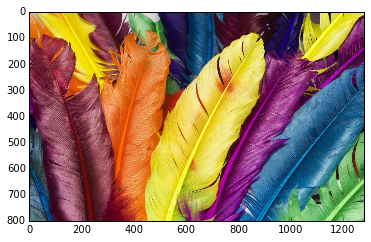



ANALYSIS FOR K = 32

RGB quantized image


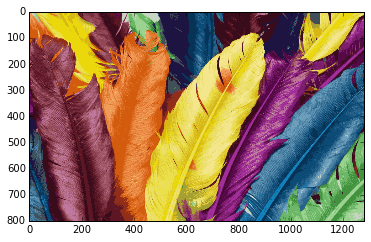

SSD between RGB quantized image and original: 8379.08637852

LAB L-Channel quantized image


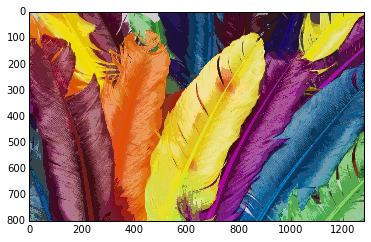

SSD between LAB L-Channel quantized image and original: 9751.92195979

Histogram for original and quantized image


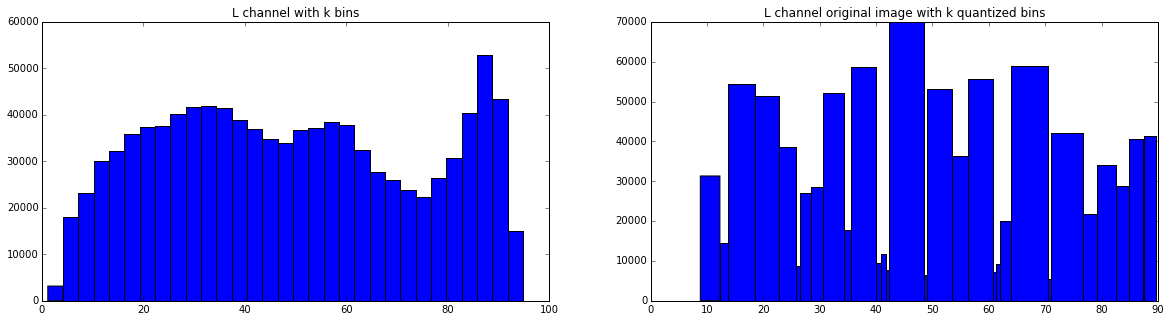



ANALYSIS FOR K = 128

RGB quantized image


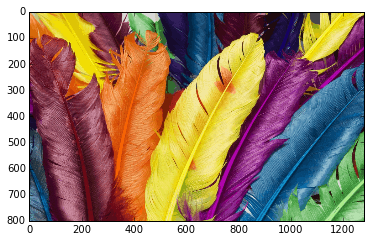

SSD between RGB quantized image and original: 2963.19961783

LAB L-Channel quantized image


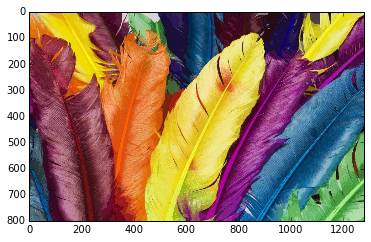

SSD between LAB L-Channel quantized image and original: 3869.71313073

Histogram for original and quantized image


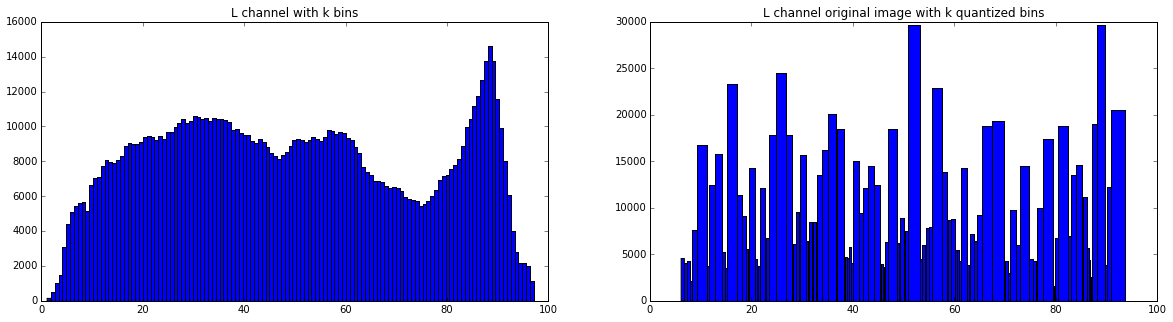

In [480]:
analyze_image(cimg2)

#### IMAGE 3


Original Image:


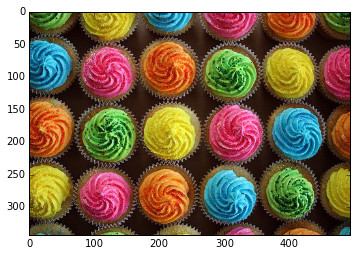



ANALYSIS FOR K = 32

RGB quantized image


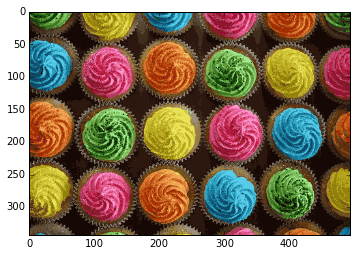

SSD between RGB quantized image and original: 1339.75646654

LAB L-Channel quantized image


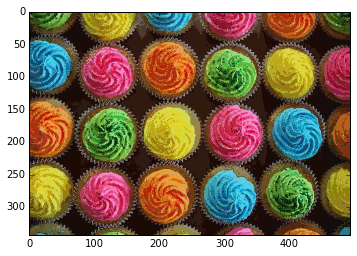

SSD between LAB L-Channel quantized image and original: 1508.11751394

Histogram for original and quantized image


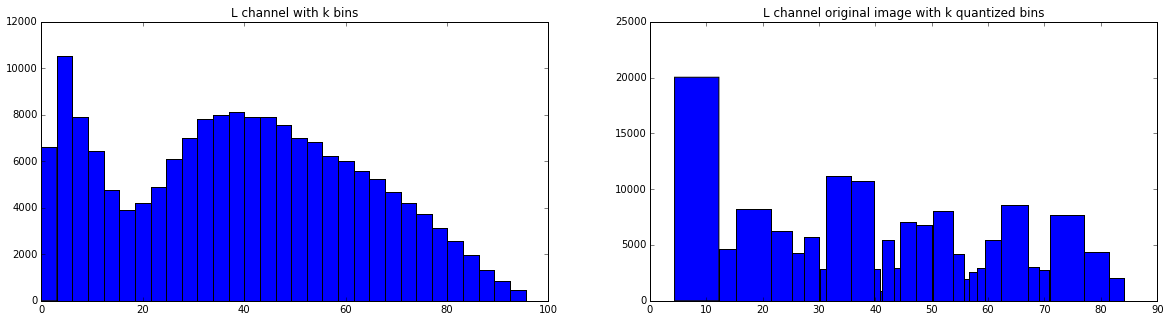



ANALYSIS FOR K = 128

RGB quantized image


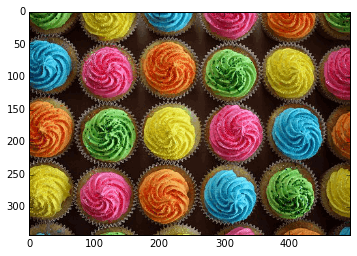

SSD between RGB quantized image and original: 517.822038161

LAB L-Channel quantized image


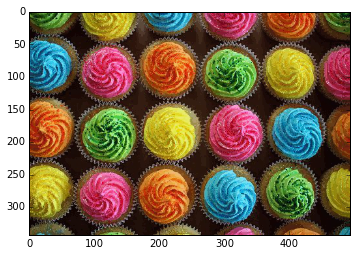

SSD between LAB L-Channel quantized image and original: 656.094746733

Histogram for original and quantized image


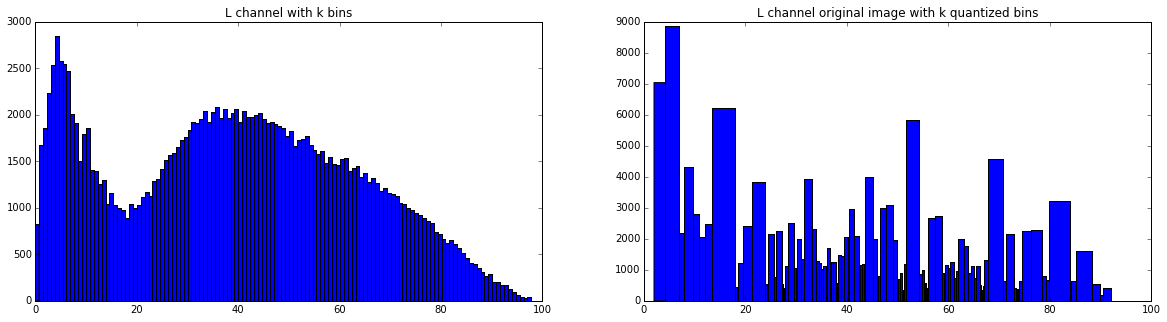

In [481]:
analyze_image(cimg3)

#### ANALYSIS OF RESULTS

**Explain the results you get. What causes the differences before and after quantization?**

We quantize the RGB values for the images first, display the quantized image, then calculate the SSD of the quantized image with the original. Finally, we plot a histogram of the L channel values of original image wrt a linear bin sequence and with bins chosen from the K-Means cluster centers.

We find that the quantized image for both RGB and L Channel approximates the original image fairly well even while taking far lesser space. It is thus similar to image compression.

As seen above, the SSD values for the quantized image is slightly smaller for the case of RGB quantized image when compared to L-Channel quantized image.

We notice that after quantization, the images seem to have patches. These patches represent the clusters we get from the K-Means algorithm.

We notice from the histograms that the L-Channel values seem to be more uniformly distributed across the quantized bins than in the case of the original. It also appears to have a higher component of values with increased lightness (L-Channel) values.



**What is the effect of changing k?**

As k increases, the quantized image better approximates the original image and the SSD between the quantized image and the original (both for RGB quantization and L-Channel quantization) reduces.



**Do you get the same results for every execution of your program?**

We expect to get the same results for every execution of the program as the random_state has been set to 0 in all of the methods that use random values. However, if we did not set the random_state to a fixed value, we will not get the same results for every execution of our program

In [42]:
# Imports

%matplotlib inline
import numpy as np
import scipy
from scipy import signal
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import cv2
from scipy import ndimage
from scipy import misc
from sklearn.utils import shuffle
from sklearn import cross_validation
from sklearn.cluster import KMeans

